# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#%matplotlib inline

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')
print(df.info())
print(df.head())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None
   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000


Null hypothesis: x comes from a normal distribution.
The null hypothesis cannot be rejected.


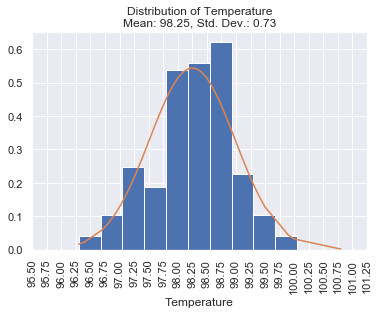

In [3]:
# 1-) Is the distribution of body temperatures normal?
temp_obs = df.temperature.sort_values()
number_bins = round(len(temp_obs)**(1/2)+0.5)
width_bins = (max(temp_obs) - min(temp_obs))/number_bins
bin_values = np.arange(min(temp_obs), max(temp_obs), width_bins)
mu, std = temp_obs.mean(), temp_obs.std()
temp_normal = stats.norm.pdf(temp_obs, mu, std)

sns.set()
_ = plt.hist(temp_obs, bins=bin_values, density=True)
_ = plt.plot(temp_obs, temp_normal)
_ = plt.xlabel('Temperature')
_ = xticks = plt.xticks(np.arange(95.5,101.5,0.25),rotation=90)
_ = plt.title(('Distribution of Temperature' +
           '\nMean: ' + str(round(mu, 2)) +
           ', Std. Dev.: ' + str(round(std, 2))))
plt.show

k2, p = stats.normaltest(temp_obs)
print('Null hypothesis: x comes from a normal distribution.')
if p < 0.05:
    print('The null hypothesis can be rejected.')
else:
    print('The null hypothesis cannot be rejected.')

In [4]:
# 2-) Is the sample size large? Are the observations independent? 
print('Sample size is', len(df), 
      'which is larger than 30 and therefore sufficiently large.')
print('As long as observations are from', len(df), 
      'different and diverse individuals, observations should be independent.')

Sample size is 130 which is larger than 30 and therefore sufficiently large.
As long as observations are from 130 different and diverse individuals, observations should be independent.


H0: True Population Mean is 98.6 F.
H1: True Population Mean is not 98.6 F.

95% confidence interval for the mean from BS = [98.12461538 98.37615385]
H0 is rejected.


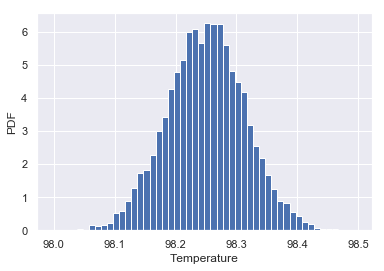

One-sample test is used to compare results from a test to a “normal” population.
We only have one sample anyway.
We do not have the population std. dev. to produce z statistic.
Therefore, we should use one-sample test and t statistic.
The t statistic is -5.4548 and the p value is 0.0
H0 is rejected.
The z statistic is -5.4759 and the p value is 0.0
The z uses standard normal, t uses t-distribution, shorter and flatter.
H0 is rejected.


In [5]:
# 3-) Is the true population mean really 98.6 degrees F?
#     First, try a bootstrap hypothesis test.
print('H0: True Population Mean is 98.6 F.')
print('H1: True Population Mean is not 98.6 F.')

def bootstrap_replicate_1d(data, func): 
    return func(np.random.choice(data, len(data)))

def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

np.random.seed(10)
bs_replicates = draw_bs_reps(temp_obs, np.mean, size=10000)
conf_int_95 = np.percentile(bs_replicates, [2.5, 97.5])
print('\n95% confidence interval for the mean from BS =', conf_int_95)
print('H0 is rejected.')

_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('PDF')
plt.show()

#     Frequentist statistical testing: would you use a one-sample or two-sample test? Why?
#     In this situation, is it appropriate to use the t or z statistic?
print('One-sample test is used to compare results from a test to a “normal” population.')
print('We only have one sample anyway.')
print('We do not have the population std. dev. to produce z statistic.')
print('Therefore, we should use one-sample test and t statistic.')
t, p_t = stats.ttest_1samp(temp_obs, 98.6)
print('The t statistic is', round(t,4),'and the p value is', round(p_t,4))
print('H0 is rejected.')

#     Now try using the other test. How is the result be different? Why? 
sem = np.std(temp_obs)/np.sqrt(len(temp_obs))
z = (np.mean(temp_obs) - 98.6)/sem
p_z = stats.norm.cdf(z)
print('The z statistic is', round(z,4),'and the p value is', round(p_z,4))
print('The z uses standard normal, t uses t-distribution, shorter and flatter.')
print('H0 is rejected.')

In [6]:
# 4-) Draw a small sample of size 10 from the data and repeat both frequentist tests.
#     Which one is the correct one to use?
#     What do you notice? 
np.random.seed(10)
sample_10 = np.random.choice(temp_obs, size=10)

t, p_t = stats.ttest_1samp(sample_10, 98.6)
print('The t statistic is', round(t,4),'and the p value is', round(p_t,4))

sem = np.std(sample_10)/np.sqrt(len(sample_10))
z = (np.mean(sample_10) - 98.6)/sem
p_z = stats.norm.cdf(z)
print('The z statistic is', round(z,4),'and the p value is', round(p_z,4))

The t statistic is -1.3694 and the p value is 0.2041
The z statistic is -1.4435 and the p value is 0.0744


In [7]:
# 5-) At what temperature should we consider someone's temperature to be "abnormal"?
print('Not taking into account medical guidelines, we can define outliers as "abnormal".')
print('We can use boxplot minimum and maximum to find outliers')

def boxplot_min_max(data): 
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 70)
    IQR = Q3 - Q1
    return Q1 - 1.5*IQR, Q3 + 1.5*IQR

min_obs, max_obs = boxplot_min_max(temp_obs)
print('The boxplot minimum and maximum for our dataset is',min_obs,'and',max_obs)
print('Thus, temperatures outside the range of',min_obs,'and',max_obs,'would be abnormal.')
print('We can find 95% confidence interval for them using bootstrap.')

np.random.seed(10)
bs_replicates = draw_bs_reps(temp_obs, boxplot_min_max, size=10000)
conf_int_95_min = np.percentile([i[0] for i in bs_replicates], [2.5, 97.5])
conf_int_95_max = np.percentile([i[1] for i in bs_replicates], [2.5, 97.5])

print('95% confidence interval for the boxplot minimum from BS =', conf_int_95_min)
print('95% confidence interval for the boxplot maximum from BS =', conf_int_95_max)
print('To be safe, we can consider the range',conf_int_95_min[1],'and',conf_int_95_max[0])

Not taking into account medical guidelines, we can define outliers as "abnormal".
We can use boxplot minimum and maximum to find outliers
The boxplot minimum and maximum for our dataset is 96.555 and 99.875
Thus, temperatures outside the range of 96.555 and 99.875 would be abnormal.
We can find 95% confidence interval for them using bootstrap.
95% confidence interval for the boxplot minimum from BS = [96.1  96.95]
95% confidence interval for the boxplot maximum from BS = [ 99.525  100.2375]
To be safe, we can consider the range 96.94999999999999 and 99.525


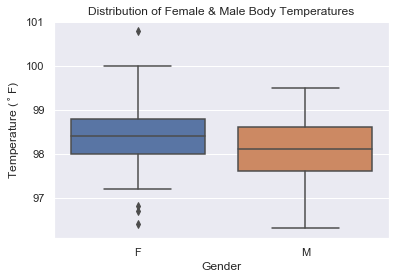

H0: no significant difference between males and females in mean temperature.
Testing that males and females have the same mean temperature.
But not necessarily the same distribution.

p-value using bootstrap= 0.0136
H0 is rejected.

Two-sided t-test:
The t statistic is 2.2854 and the p value is 0.0239
H0 is rejected.


In [8]:
# 6-) Is there a significant difference between males and females in normal temperature?
#     What testing approach did you use and why?

_ = sns.boxplot(x='gender', y='temperature', data=df)
_ = plt.xlabel('Gender', fontsize=12)
_ = plt.ylabel('Temperature ($^\circ$F)')
_ = plt.title('Distribution of Female & Male Body Temperatures', fontsize=12)
plt.show()

print('H0: no significant difference between males and females in mean temperature.')
print('Testing that males and females have the same mean temperature.')
print('But not necessarily the same distribution.')

mean_temp = np.mean(df.temperature)

female_temp = df.temperature[df.gender == 'F']
female_mean_temp = np.mean(female_temp)
female_temp_shifted = female_temp - female_mean_temp + mean_temp

male_temp = df.temperature[df.gender == 'M']
male_mean_temp = np.mean(male_temp)
male_temp_shifted = male_temp - male_mean_temp + mean_temp

bs_replicates_female = draw_bs_reps(female_temp_shifted, np.mean, size=10000)
bs_replicates_male = draw_bs_reps(male_temp_shifted, np.mean, size=10000)
bs_replicates = bs_replicates_female - bs_replicates_male

empirical_diff_means = female_mean_temp - male_mean_temp
p = np.sum(bs_replicates >= empirical_diff_means)/len(bs_replicates)
print('\np-value using bootstrap=', p)
print('H0 is rejected.')

print('\nTwo-sided t-test:')
t, p_t = stats.ttest_ind(female_temp, male_temp, equal_var=False)
print('The t statistic is', round(t,4),'and the p value is', round(p_t,4))
print('H0 is rejected.')